In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# importing data

### Training and test data

In [27]:
import warnings
warnings.filterwarnings(action="ignore",category=FutureWarning)
import math

def mean_squared_error(x,y):
    y_p=np.asarray(y).reshape(-1)
    return np.mean((x-y_p)**2)
    

In [28]:
train_df=pd.read_csv("train.csv")
test_df=pd.read_csv("test.csv")


train_df.head()


,X,y
0,-0.1185,3.566426
1,2.9090,10.469470
2,0.6750,-2.294876
3,0.8235,-2.213631
4,-0.1110,3.541580


In [29]:
test_df.head()

,X,y
0,2.8205,8.898277
1,1.5800,8.453817
2,2.3425,1.717662
3,-2.5415,-10.476481
4,-1.7935,-2.081427


In [30]:
train_df.shape

(129, 2)

In [31]:
test_df.shape

(10, 2)

In [32]:
Data=[]

## Frequency k increment = 4

# Linear Regression

1. Consider a simplified fitting problem in the frequency domain where we are looking to find the best fit
of data with a set of periodic (trigonometric) basis functions of the form 1, x, sin(x), cos(x), sin(k ∗
x), cos(k ∗ x), sin(2 ∗ k ∗ x), cos(2 ∗ k ∗ x), ..., where k is effectively the frequency increment. The
resulting function for a given ”frequency increment”, k, and ”function depth”, d, and parameter vector Θ
is then:

$$y = Θ_{0} ∗ 1 + Θ_{1} ∗ x + \sum_{i=1}^{d}(Θ_{2*i} ∗ sin(i ∗ k ∗ x) + Θ_{2∗i+1} ∗ cos(i ∗ k ∗ x))$$


For example, if k = 1 and d = 2, your basis (feature) functions are 1, x, sin(x), cos(x), sin(2x), cos(2x),
and we are looking for the best matching parameters Θ for the function $$Θ_{0} + Θ_{1} ∗ x + Θ_{2} ∗ sin(x) +
Θ_{3} ∗ cos(x) + Θ_{4}∗ sin(2x) + Θ_{5} ∗ cos(2x)$$.

This means that this problem can be solved using linear
regression as the function is linear in terms of the parameters Θ.
You obtain your value for the ”frequency increment” k and thus your basis functions as part of the data
generation process described above.

a). Implement a linear regression learner to solve this best fit problem for 1 dimensional data. Make
sure your implementation can handle fits for different ”function depths” (at least to ”depth” 6).

b). Apply your regression learner to the data set that was generated for Question 1b) and plot the
resulting function for ”function depth” 0, 1, 2, 3, 4, 5, and 6. Plot the resulting function together
with the data points (using your favorite plotting program, e.g. Matlab, Octave, ...)

c) Evaluate your regression functions by computing the error on the test data points that were generated
for Question 1c). Compare the error results and try to determine for what polynomials overfitting
might be a problem. Which order polynomial would you consider the best prediction function and
why.


d) Repeat the experiment and evaluation of part b) and c) using only the first 20 elements of the training
data set part b) and the Test set of part c). What differences do you see and why might they occur ?



Text(0.5, 0.98, 'Question 1(a): Linear Regression using all elements(tau=0.1).')

Text(0.5, 1.0, 'Function depth=0')

Text(0.5, 1.0, 'Function depth=1')

Text(0.5, 1.0, 'Function depth=2')

Text(0.5, 1.0, 'Function depth=3')

Text(0.5, 1.0, 'Function depth=4')

Text(0.5, 1.0, 'Function depth=5')

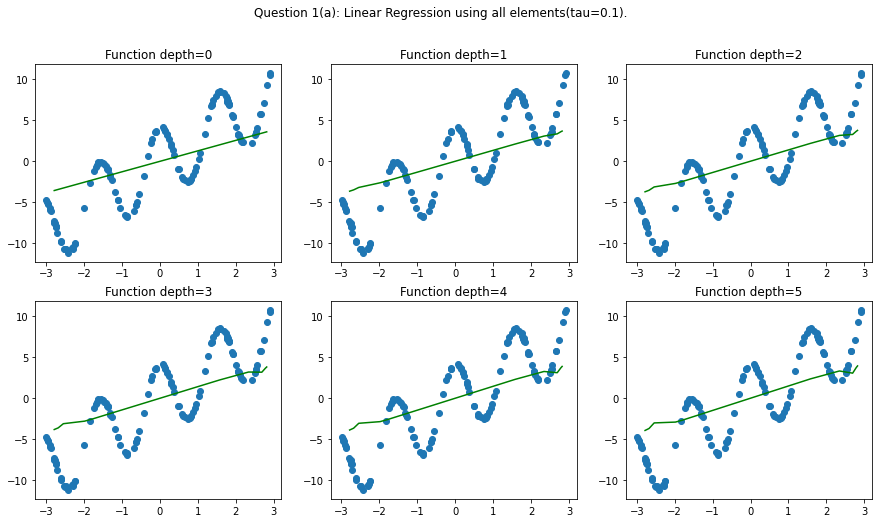

In [35]:
#Defining the class
class LinearRegression() :
      
    def __init__( self, learning_rate, iterations ) :
          
        self.learning_rate = learning_rate
          
        self.iterations = iterations
          
    # Function for model training
              
    def fit( self, X, Y ) :
          
        # no_of_training_examples, no_of_features
          
        self.m, self.n = X.shape
          
        # weight initialization
        #print(self.m,self.n)
          
        self.W = np.zeros( self.n )
          
        self.b = 0
          
        self.X = X
          
        self.Y = Y
          
          
        # gradient descent learning
                  
        for i in range( self.iterations ) :
              
            self.update_weights()
              
        return self
      
    # Helper function to update weights in gradient descent
      
    def update_weights(self) :
             
        Y_pred = np.asarray(self.predict( self.X )).reshape(-1)
          
      
        dW = - ( 2 * ( self.X.T).dot( self.Y - Y_pred )  ) / self.m
        
        
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m 
        # update weights
      
        self.W = self.W - self.learning_rate * dW
      
        self.b = self.b - self.learning_rate * db
          
        return self
      
    # Hypothetical function  h( x ) 
      
    def predict( self, X ) :
      
        return X.dot( self.W.T ) + self.b
     

def logreg(X,d,k=4):
    """Return y of x based on theta vector, frequency increment k, and function depth d."""
    data=[]
    
    for i,x in enumerate(X):
        data.append([1,x])
        for p in range(1,d+1):
            data[i].append(np.sin(i*k*x))
            data[i].append(np.cos(i*k*x))
    return np.matrix(data)

def r2_score(x, y):
    """ Return R^2 where x and y are array-like."""
    y_p=np.asarray(y).reshape(-1)
    slope, intercept, r_value, p_value, std_err = sp.stats.linregress(x, y_p)
    return r_value**2

d0=logreg(train_df.X,0)
d1=logreg(train_df.X,1)
d2=logreg(train_df.X,2)
d3=logreg(train_df.X,3)
d4=logreg(train_df.X,4)
d5=logreg(train_df.X,5)

d0m=LinearRegression(0.0001,1000)
d0m.fit(d0,train_df.y)

d1m=LinearRegression(0.0001,1000)
d1m.fit(d1,train_df.y)

d2m=LinearRegression(0.0001,1000)
d2m.fit(d2,train_df.y)

d3m=LinearRegression(0.0001,1000)
d3m.fit(d3,train_df.y)

d4m=LinearRegression(0.0001,1000)
d4m.fit(d4,train_df.y)

d5m=LinearRegression(0.0001,1000)
d5m.fit(d5,train_df.y)


#print(d0m.coef_,d1m.coef_,d2m.coef_,d3m.coef_,d4m.coef_,d5m.coef_,sep="\n\n")


err0=mean_squared_error(test_df.y,d0m.predict(logreg(test_df.X,0)))
err1=mean_squared_error(test_df.y,d1m.predict(logreg(test_df.X,1)))
err2=mean_squared_error(test_df.y,d2m.predict(logreg(test_df.X,2)))
err3=mean_squared_error(test_df.y,d3m.predict(logreg(test_df.X,3)))
err4=mean_squared_error(test_df.y,d4m.predict(logreg(test_df.X,4)))
err5=mean_squared_error(test_df.y,d5m.predict(logreg(test_df.X,5)))


acc0=r2_score(test_df.y,d0m.predict(logreg(test_df.X,0)))
acc1=r2_score(test_df.y,d1m.predict(logreg(test_df.X,1)))
acc2=r2_score(test_df.y,d2m.predict(logreg(test_df.X,2)))
acc3=r2_score(test_df.y,d3m.predict(logreg(test_df.X,3)))
acc4=r2_score(test_df.y,d4m.predict(logreg(test_df.X,4)))
acc5=r2_score(test_df.y,d5m.predict(logreg(test_df.X,5)))

accs=[acc0,acc1,acc2,acc3,acc4,acc5]
errs=[err0,err1,err2,err3,err4,err5]
Data.append({"mse":errs,"r2_score":accs})

#print(err0,err1,err2,err3,err4,err5,sep='\n\n')

#print(f"{acc0*100}%",f"{acc1*100}%",f"{acc2*100}%",f"{acc3*100}%",f"{acc4*100}%",f"{acc5*100}%",sep='\n\n')


models=[d0m,d1m,d2m,d3m,d4m,d5m]
fig,((ax0,ax1,ax2),(ax3,ax4,ax5))=plt.subplots(2,3,figsize=(15,8))
axes=[ax0,ax1,ax2,ax3,ax4,ax5]

xsort=test_df.X.copy()
xsort.sort_values(axis=0,inplace=True)
fig.suptitle("Question 1(a): Linear Regression using all elements(tau=0.1).")
for i,mod in enumerate(models):
    axes[i].scatter(train_df.X,train_df.y)
    axes[i].set_title(f"Function depth={i}")
    axes[i].plot(xsort,mod.predict(logreg(test_df.X,i))[test_df.X.argsort(0)],color='g')
plt.savefig("1a.png")

18.334555455787225

17.60231107487261

17.018337276723685

16.55395738783937

16.185953936471442

15.895538971850034


88.15964485258765%

87.90986697395854%

87.4021947438815%

86.76028850713946%

86.06136172788241%

85.35261418804328%


Text(0.5, 0.98, 'Question 1(b): Linear Regression using First 20 elements(tau=0.1).')

Text(0.5, 1.0, 'Function depth=0')

Text(0.5, 1.0, 'Function depth=1')

Text(0.5, 1.0, 'Function depth=2')

Text(0.5, 1.0, 'Function depth=3')

Text(0.5, 1.0, 'Function depth=4')

Text(0.5, 1.0, 'Function depth=5')

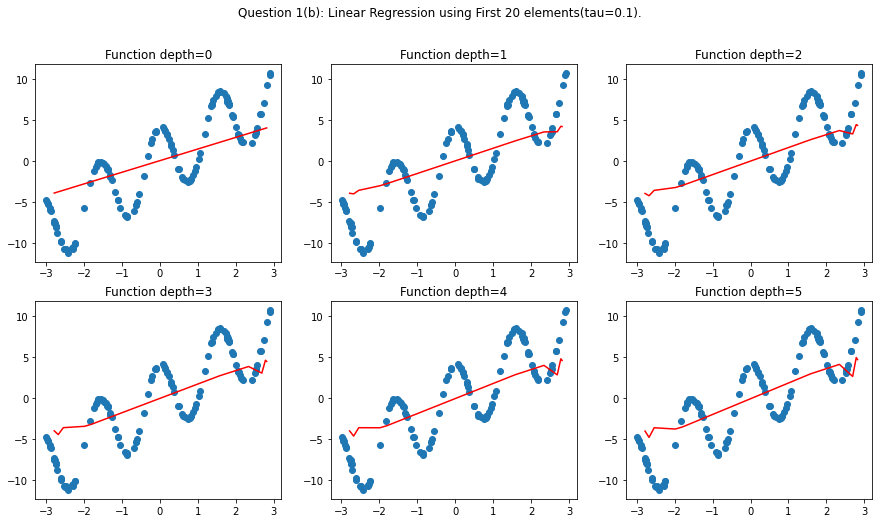

In [36]:
# Repeat evaluation using first 20 elements of trainset
d0a=logreg(train_df.X.iloc[0:20],0)
d1a=logreg(train_df.X.iloc[0:20],1)
d2a=logreg(train_df.X.iloc[0:20],2)
d3a=logreg(train_df.X.iloc[0:20],3)
d4a=logreg(train_df.X.iloc[0:20],4)
d5a=logreg(train_df.X.iloc[0:20],5)

d0am=LinearRegression(0.0001,1000)
d0am.fit(d0a,train_df.iloc[0:20].y)

d1am=LinearRegression(0.0001,1000)
d1am.fit(d1a,train_df.iloc[0:20].y)

d2am=LinearRegression(0.0001,1000)
d2am.fit(d2a,train_df.iloc[0:20].y)

d3am=LinearRegression(0.0001,1000)
d3am.fit(d3a,train_df.iloc[0:20].y)

d4am=LinearRegression(0.0001,1000)
d4am.fit(d4a,train_df.iloc[0:20].y)

d5am=LinearRegression(0.0001,1000)
d5am.fit(d5a,train_df.iloc[0:20].y)

err0a=mean_squared_error(test_df.y,d0am.predict(logreg(test_df.X,0)))
err1a=mean_squared_error(test_df.y,d1am.predict(logreg(test_df.X,1)))
err2a=mean_squared_error(test_df.y,d2am.predict(logreg(test_df.X,2)))
err3a=mean_squared_error(test_df.y,d3am.predict(logreg(test_df.X,3)))
err4a=mean_squared_error(test_df.y,d4am.predict(logreg(test_df.X,4)))
err5a=mean_squared_error(test_df.y,d5am.predict(logreg(test_df.X,5)))


acc0a=r2_score(test_df.y,d0am.predict(logreg(test_df.X,0)))
acc1a=r2_score(test_df.y,d1am.predict(logreg(test_df.X,1)))
acc2a=r2_score(test_df.y,d2am.predict(logreg(test_df.X,2)))
acc3a=r2_score(test_df.y,d3am.predict(logreg(test_df.X,3)))
acc4a=r2_score(test_df.y,d4am.predict(logreg(test_df.X,4)))
acc5a=r2_score(test_df.y,d5am.predict(logreg(test_df.X,5)))

accs=[acc0a,acc1a,acc2a,acc3a,acc4a,acc5a]
erras=[err0a,err1a,err2a,err3a,err4a,err5a]

Data.append({"mse":erras,"r2_score":accs})
print(err0a,err1a,err2a,err3a,err4a,err5a,sep='\n\n')
print("\n")

print(f"{acc0a*100}%",f"{acc1a*100}%",f"{acc2a*100}%",f"{acc3a*100}%",f"{acc4a*100}%",f"{acc5a*100}%",sep='\n\n')

models=[d0am,d1am,d2am,d3am,d4am,d5am]
fig,((ax0,ax1,ax2),(ax3,ax4,ax5))=plt.subplots(2,3,figsize=(15,8))
axes=[ax0,ax1,ax2,ax3,ax4,ax5]
xsort=test_df.X.copy()
xsort.sort_values(axis=0,inplace=True)
fig.suptitle("Question 1(b): Linear Regression using First 20 elements(tau=0.1).")
for i,mod in enumerate(models):
    axes[i].scatter(train_df.X,train_df.y)
    axes[i].set_title(f"Function depth={i}")
    axes[i].plot(xsort,mod.predict(logreg(test_df.X,i))[test_df.X.argsort(0)],color='r')
plt.savefig("1b.png")

In [37]:
[Data[i].update({"name":f"part_{i}"}) for i in range(len(Data))]
Data

import json
with open("q1.json","w") as wf:
    json.dump(Data,wf)

[None, None, None]

[{'mse': [20.781787382596434,
   20.519965064665662,
   20.294385011660623,
   20.09957155606424,
   19.930937788664696,
   19.784634337006448],
  'r2_score': [0.6156099690112055,
   0.6204527617436173,
   0.624625199944851,
   0.6282285642202665,
   0.631347696270032,
   0.6340537959563264],
  'name': 'part_0'},
 {'mse': [20.781787382596434,
   20.519965064665662,
   20.294385011660623,
   20.09957155606424,
   19.930937788664696,
   19.784634337006448],
  'r2_score': [0.8815964485258763,
   0.8788213031724262,
   0.8757546710368447,
   0.8725716166064833,
   0.8693910806511123,
   0.8662920356544491],
  'name': 'part_1'},
 {'mse': [18.334555455787225,
   17.60231107487261,
   17.018337276723685,
   16.55395738783937,
   16.185953936471442,
   15.895538971850034],
  'r2_score': [0.8815964485258765,
   0.8790986697395855,
   0.8740219474388149,
   0.8676028850713946,
   0.8606136172788241,
   0.8535261418804327],
  'name': 'part_2'}]

In [38]:
d1f=pd.DataFrame.from_dict(Data)
df=pd.DataFrame()
df["mse_all"]=d1f.mse[0]
df["mse_20"]=d1f.mse[1]
df["r2_all"]=d1f.r2_score[0]
df["r2_20"]=d1f.r2_score[1]
df

,mse_all,mse_20,r2_all,r2_20
0,20.781787,20.781787,0.615610,0.881596
1,20.519965,20.519965,0.620453,0.878821
2,20.294385,20.294385,0.624625,0.875755
3,20.099572,20.099572,0.628229,0.872572
4,19.930938,19.930938,0.631348,0.869391
5,19.784634,19.784634,0.634054,0.866292


In [39]:
Data=[]

# Locally Weighted Linear Regression

2. Another way to address nonlinear functions with a lower likelihood of overfitting is the use of locally weighted linear regression where the neighborhood function addresses non-linearity and the feature vector stays simple. In this case we assume that we will use only the raw feature, x, as well as the bias (i.e.
a constant feature 1).
Thus the locally applied regression function is $$y = Θ_{0} + Θ_{1} ∗ x.$$

As discussed in class, locally weighted linear regression solves a linear regression problem for each query
point, deriving a local approximation for the shape of the function at that point (as well as for its value).
To achieve this, it uses a modified error function that applies a weight to each data point’s error that is
related to its distance from the query point. Here we will assume that the weight function for the ith data
point and query point x is: $$w^{i} (x) = e^{-\frac{(x^{i}-x)^{2}}{(2γ^{2})}}$$

where γ is a measure of the ”locality” of the weight function, indicating how fast the influence of a data
point changes with its distance from the query point.
Your value for γ is provided during data generation.
a) Implement a locally weighted linear regression learner to solve the best fit problem for 1 dimen-
sional data.

b) Apply your locally weighted linear regression learner to the data set that was generated for Ques-
tion 1b) and plot the resulting function together with the data points (using your favorite plotting
program, e.g. Matlab, Octave, ...)

c) Evaluate the locally weighted linear regression on the Test data from Question 1 c). How does the
performance compare to the one for the results from Question 1 c) ?

d) Repeat the experiment and evaluation of part b) and c) using only the first 20 elements of the training
data set. How does the performance compare to the one for the results from Question 1 d) ? Why
might this be the case ?

e) Given the results form parts c) and d), do you believe the data set you used was actually derived
from a function that is consistent with the function format in Question 1 ? Justify your answer.


## Question 2 weight scaling factor γ : 0.1

0.3566811437504075


99.0171722066146%


Text(0.5, 1.0, 'Question 2a: Locally Weighted Linear Regression using all elements(tau=0.1)')

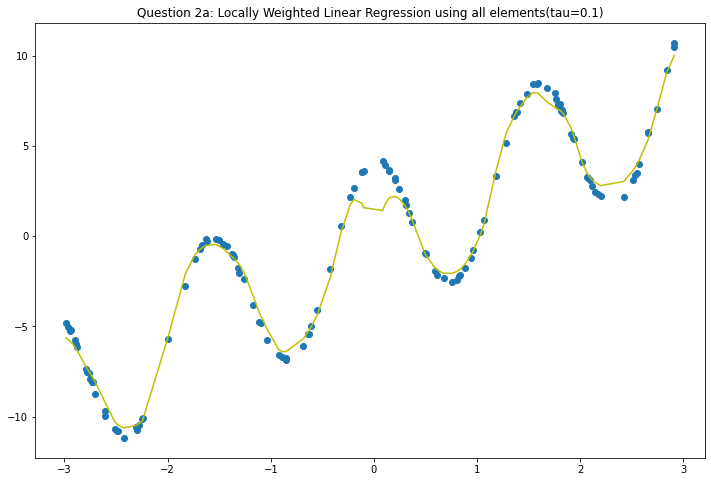

In [40]:
def kernel(pt,X,tau):
    m,n=np.shape(X)
    weights=np.mat(np.eye((m)))
    for j in range(m):
        diff=pt-X[j]
        weights[j,j]=np.exp(diff*diff.T / (-2 * (tau **2)))
    return weights

def lweight(pt,X,Y,tau):
    wt=kernel(pt,X,tau)
    w_x=(X.T*(wt*X)).I*(X.T*wt*Y.T)
    return w_x

def lweightedreg(X,Y,tau=0.1):
    m,n=np.shape(X)
    X=np.mat(X)
    Y=np.mat(Y)
    y_pred=np.zeros(m)
    for i in range(m):
        y_pred[i]=X[i]*lweight(X[i],X,Y,tau)
        
    return y_pred




def logregW(X,k=4):
    """Return y of x based."""
    data=[]
    
    for i,x in enumerate(X):
        data.append([x])
    return np.asarray(data)



d0aw=logregW(train_df.X)
d1aw=logregW(train_df.X)
d2aw=logregW(train_df.X)
d3aw=logregW(train_df.X)
d4aw=logregW(train_df.X)
d5aw=logregW(train_df.X)

d0amw=lweightedreg(d0aw,train_df.y)
#d0amw.fit(d0aw,train_df.y)

d1amw=lweightedreg(d1aw,train_df.y)
#d1amw.fit(d1aw,train_df.y)

d2amw=lweightedreg(d2aw,train_df.y)
#d2amw.fit(d2aw,train_df.y)

d3amw=lweightedreg(d3aw,train_df.y)
#d3amw.fit(d3aw,train_df.y)

d4amw=lweightedreg(d4aw,train_df.y)
#d4amw.fit(d4aw,train_df.y)

d5amw=lweightedreg(d5aw,train_df.y)
#d5amw.fit(d5aw,train_df.y)
#print(d0amw)

err0aw=mean_squared_error(train_df.y,d0amw)
err1aw=mean_squared_error(train_df.y,d1amw)
err2aw=mean_squared_error(train_df.y,d2amw)
err3aw=mean_squared_error(train_df.y,d3amw)
err4aw=mean_squared_error(train_df.y,d4amw)
err5aw=mean_squared_error(train_df.y,d5amw)


acc0aw=r2_score(train_df.y,d0amw)
acc1aw=r2_score(train_df.y,d1amw)
acc2aw=r2_score(train_df.y,d2amw)
acc3aw=r2_score(train_df.y,d3amw)
acc4aw=r2_score(train_df.y,d4amw)
acc5aw=r2_score(train_df.y,d5amw)

accsw=[acc0aw,acc1aw,acc2aw,acc3aw,acc4aw,acc5aw]
errsw=[err0aw,err1aw,err2aw,acc3aw,err4aw,err5aw]

print(err0aw,sep='\n\n')
print("\n")

print(f"{acc0aw*100}%",sep='\n\n')
Data.append({"mse":errsw[0],"r2_score":accsw[0]})
models=[d0amw]
fig,ax=plt.subplots(1,1,figsize=(12,8))
axes=[ax]
xsort=train_df.X.copy()
xsort.sort_values(axis=0,inplace=True)
for i,mod in enumerate(models):
    axes[i].scatter(train_df.X,train_df.y)
    axes[i].set_title(f"Question 2a: Locally Weighted Linear Regression using all elements(tau=0.1)")
    axes[i].plot(xsort,mod[train_df.X.argsort(0)],color='y')
plt.savefig("2a.png")

0.09402456730116786


99.76729318163619%


Text(0.5, 1.0, 'Question 2b:Locally Weighted Linear Regression: first 20 elements(tau=0.1)')

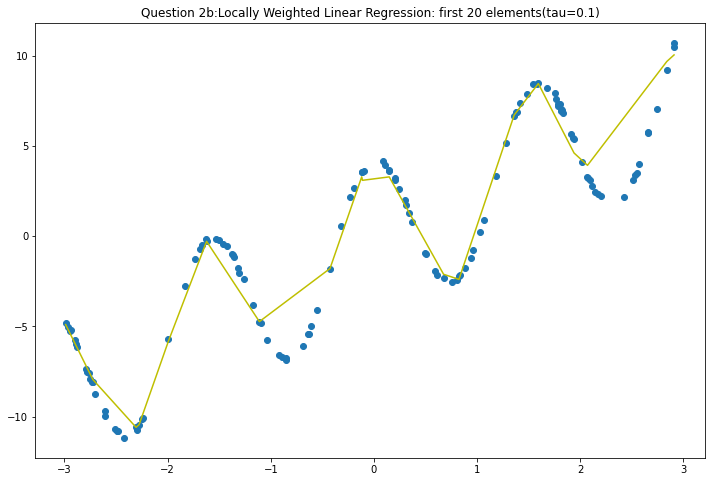

In [41]:
d0aw=logregW(train_df.X.iloc[0:20])
d1aw=logregW(train_df.X.iloc[0:20])
d2aw=logregW(train_df.X.iloc[0:20])
d3aw=logregW(train_df.X.iloc[0:20])
d4aw=logregW(train_df.X.iloc[0:20])
d5aw=logregW(train_df.X.iloc[0:20])

d0amw=lweightedreg(d0aw,train_df.y.iloc[0:20])
#d0amw.fit(d0aw,train_df.y)

d1amw=lweightedreg(d1aw,train_df.y.iloc[0:20])
#d1amw.fit(d1aw,train_df.y)

d2amw=lweightedreg(d2aw,train_df.y.iloc[0:20])
#d2amw.fit(d2aw,train_df.y)

d3amw=lweightedreg(d3aw,train_df.y.iloc[0:20])
#d3amw.fit(d3aw,train_df.y)

d4amw=lweightedreg(d4aw,train_df.y.iloc[0:20])
#d4amw.fit(d4aw,train_df.y)

d5amw=lweightedreg(d5aw,train_df.y.iloc[0:20])
#d5amw.fit(d5aw,train_df.y)
#print(d0amw)

err0aw=mean_squared_error(train_df.y.iloc[0:20],d0amw)
err1aw=mean_squared_error(train_df.y.iloc[0:20],d1amw)
err2aw=mean_squared_error(train_df.y.iloc[0:20],d2amw)
err3aw=mean_squared_error(train_df.y.iloc[0:20],d3amw)
err4aw=mean_squared_error(train_df.y.iloc[0:20],d4amw)
err5aw=mean_squared_error(train_df.y.iloc[0:20],d5amw)


acc0aw=r2_score(train_df.y.iloc[0:20],d0amw)
acc1aw=r2_score(train_df.y.iloc[0:20],d1amw)
acc2aw=r2_score(train_df.y.iloc[0:20],d2amw)
acc3aw=r2_score(train_df.y.iloc[0:20],d3amw)
acc4aw=r2_score(train_df.y.iloc[0:20],d4amw)
acc5aw=r2_score(train_df.y.iloc[0:20],d5amw)

accsaw=[acc0aw,acc1aw,acc2aw,acc3aw,acc4aw,acc5aw]
erraws=[err0aw,err1aw,err2aw,acc3aw,err4aw,err5aw]

print(err0aw,sep='\n\n')
print("\n")

print(f"{acc0aw*100}%",sep='\n\n')
Data.append({"mse":erraws[0],"r2_score":accsaw[0]})
models=[d0amw]
fig,ax=plt.subplots(1,1,figsize=(12,8))
axes=[ax]
xsort=train_df.X.iloc[0:20].copy()
xsort.sort_values(axis=0,inplace=True)
for i,mod in enumerate(models):
    axes[i].scatter(train_df.X,train_df.y)
    axes[i].set_title(f"Question 2b:Locally Weighted Linear Regression: first 20 elements(tau=0.1)")
    axes[i].plot(xsort,mod[train_df.X.iloc[0:20].argsort(0)],color='y')
plt.savefig("2b.png")

In [42]:
[Data[i].update({"name":f"part_{i}"}) for i in range(len(Data))]
print(Data)

import json
with open("q2.json","w") as wf:
    json.dump(Data,wf)

[None, None]

[{'mse': 0.3566811437504075, 'r2_score': 0.990171722066146, 'name': 'part_0'}, {'mse': 0.09402456730116786, 'r2_score': 0.9976729318163619, 'name': 'part_1'}]


In [43]:
!ls

1a.png		  gender_data.csv		    q3.png
1b.png		  generate_data.pdf		    report.docx
1b_train_data.py  generate_data_proj1.pdf	    report.pdf
1comp.png	  generate_data_proj1.php.html	    test.csv
2a.png		  Notes.md			    t.py
2b.png		  plot_classifier_comparison.ipynb  train.csv
2comp.png	  proj1.pdf			    without_age_accuracy.png
accuracy.png	  q1.json
Analysis.ipynb	  q2.json


In [44]:
d2f=pd.DataFrame.from_dict(Data)
d2f

,mse,r2_score,name
0,0.356681,0.990172,part_0
1,0.094025,0.997673,part_1


# Logistic Regression
3. Consider again the problem from Questions 2 and 3 in the first assignment where we want to predict the gender of a person from a set of input parameters, namely height, weight, and age. Assume the same datasets you generated for the first assignment.

a) Implement logistic regression to classify this data (use the individual data elements, i.e. height,
weight, and age, as features). Your implementation should take different data sets as input for
learning.


b) Plot the resulting function together with the data points (using your favorite plotting program, e.g.
Matlab, Octave, ...). To generate the function for locally weighted linear regression for this data you
need to compute its value for finely spaced test data points, x, between −3 and 3.


c) Evaluate the performance of your logistic regression classifier in the same way as for Homework
1 using leve-one-out validation and compare the results with the ones for KNN and Naı̈ve Bayes
(either from your first assignment or, if you did not implement these, using an existing implemen-
tation). Discuss what differences exist and why one method might outperform the others for this
problem.


d) Repeat the evaluation and comparison from part c) with the age feature removed. Again, discuss
what differences exist and why one method might outperform the others in this case.



In [77]:
df=pd.read_csv("gender_data.csv")
df.shape
df.head()

(120, 4)

,height,weight,age,gender
0,1.702639,76.802746,25,M
1,1.697199,77.269872,24,W
2,1.834627,83.110254,23,M
3,1.937070,81.158630,30,M
4,1.883345,79.561306,29,M


In [53]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.verbose=verbose
        self.fit_intercept = fit_intercept
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            if(self.verbose == True and i % 10000 == 0):
                z = np.dot(X, self.theta)
                h = self.__sigmoid(z)
                print(f'loss: {self.__loss(h, y)} \t')
    
    def predict_proba(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X, threshold=0.5):
        return self.predict_proba(X) >= threshold

In [60]:
#define cross-validation method to use

lr=LogisticRegression(lr=0.1, num_iter=300000)

def lencode(x):
    if x=="M":
        return 1
    else:
        return 2

X=df[["height","weight"]]
df["gender_code"]=df["gender"].apply(lencode)
y=df["gender_code"]
#df.info()
df.head()
df.shape

,height,weight,age,gender,gender_code
0,1.702639,76.802746,25,M,1
1,1.697199,77.269872,24,W,2
2,1.834627,83.110254,23,M,1
3,1.937070,81.158630,30,M,1
4,1.883345,79.561306,29,M,1


(120, 5)

In [61]:
X_train, X_test, y_train, y_test = X.iloc[0:80],X.iloc[80:],y.iloc[0:80],y.iloc[80:]
warnings.filterwarnings(action="ignore",category=UserWarning)
warnings.filterwarnings(action="ignore",category=Warning)
lr.fit(X_train,y_train);


In [51]:

from data import heights, weights, age, gender, samples, k_values,program_height,program_age,program_gender,program_weight

def calculate_cartesian_distance_withOutage(sample, df_dataset):
    inputs = df_dataset.drop(['age', 'gender'], axis=1).values
    diffs = sample - inputs
    sum_pow = np.sum(np.power(diffs, 2), axis=1)

    return np.power(sum_pow, 0.5)


def calculate_cartesian_distance_withage(sample, df_dataset):
    inputs = df_dataset.drop(['gender'], axis=1).values
    diffs = sample - inputs
    sum_pow = np.sum(np.power(diffs, 2), axis=1)

    return np.power(sum_pow, 0.5)


def gender_prediction(k, sorted_labels):
    # the method predicts the gender with the help of k-nearest nighbour and sorted_labels
    k_nearest_neighbors = sorted_labels[:k]
    men_occurencies = np.count_nonzero(k_nearest_neighbors == 'M')
    women_occurencies = np.count_nonzero(k_nearest_neighbors == 'W')

    return 'M' if men_occurencies > women_occurencies else 'W'


def kNN_classifier(sample, k, df_dataset, drop_age):
    if drop_age:
        cart_distance = calculate_cartesian_distance_withOutage(
            sample, df_dataset)
    else:
        cart_distance = calculate_cartesian_distance_withage(
            sample, df_dataset)

    labels = df_dataset["gender"].values

    # get the cartesian distance from each data point
    # cart_distance = cartesian_distance(sample, inputs)

    # create a 2D array with the 1st column being the above distances and the second corresponding label
    labeled_cart = np.vstack((cart_distance, labels))

    # sort in an ascending manner the above 2D array based on the distances
    sorted_cart = labeled_cart.T[labeled_cart.T[:, 0].argsort()]
    sorted_labels = sorted_cart.T[1]

    return gender_prediction(k, sorted_labels)

def samplesClassification(samples,training_dataset):
    for sample in samples:
        print("For samples :{} - the predictions are ".format(sample) )
        # selecting the neiighbors for each classification for each samples.
        for k in k_values:
            # print("\tK:{}".format(k))
            prediction_1 = kNN_classifier(
                sample, k, training_dataset, drop_age=False)
            print("\tFor k:{} number of neighbors prediction is {} ".format(
                k,prediction_1))
            # prediction_2 = kNN_classifier(sample[:2], k, df_dataset,
            #                                   drop_age=True)  # assumption: gender is is the 3rd element of the sample
            # print("\tPrediction is {} for k:{} number of neighbors without using age feature".format(prediction_2, k))
            print()
    print()

df_dataset = pd.DataFrame({'heights': heights, 'weights': weights, 'age': age, 'gender': gender})

program_dataset = pd.DataFrame({'heights': program_height, 'weights': program_weight, 'age': program_age, 'gender': program_gender})

samplesClassification(samples,df_dataset)

for k in k_values:
        valid_predictions_all_features, valid_predictions_exclude_age = 0, 0

        # test with leave-1-out training method
        for index, test_sample in program_dataset.iterrows():
            sample = test_sample.values[:3]  # leave the target out
            target = test_sample.values[3]
            prediction = kNN_classifier(
                sample, k, program_dataset.drop(index), drop_age=False)
            valid_predictions_all_features += 1 if target == prediction else 0

            prediction = kNN_classifier(
                sample[:2], k, program_dataset.drop(index), drop_age=True)
            valid_predictions_exclude_age += 1 if target == prediction else 0
        print("KNN Performance using k:{}".format(k))
        print("{}/{} correct predictions using all features".format(
            valid_predictions_all_features, program_dataset.shape[0]))
        print("{}/{} correct predictions excluding age".format(
            valid_predictions_exclude_age, program_dataset.shape[0]))
        print()

For samples :[1.8184923035897, 66.646602087329, 29] - the predictions are 
	For k:1 number of neighbors prediction is W 

	For k:3 number of neighbors prediction is W 

	For k:5 number of neighbors prediction is W 

For samples :[1.648406974399, 73.059070491065, 34] - the predictions are 
	For k:1 number of neighbors prediction is M 

	For k:3 number of neighbors prediction is W 

	For k:5 number of neighbors prediction is W 

For samples :[1.6474627731456, 70.909032272466, 29] - the predictions are 
	For k:1 number of neighbors prediction is M 

	For k:3 number of neighbors prediction is W 

	For k:5 number of neighbors prediction is W 

For samples :[1.7661393134637, 79.730137027542, 20] - the predictions are 
	For k:1 number of neighbors prediction is M 

	For k:3 number of neighbors prediction is W 

	For k:5 number of neighbors prediction is M 


KNN Performance using k:1
82/120 correct predictions using all features
78/120 correct predictions excluding age

KNN Performance using 

In [62]:
l=np.linspace(-3,3,300)
#l
correct=0
hy=lr.predict(X_test)
for v1,v2 in zip(hy,y_test):
    if v1==v2:
        correct+=1
print(f"Without age feature: {correct} out of {len(y_test)}")

Without age feature: 29 out of 40


In [64]:
# With Age
X=df[["height","weight","age"]]
X_train, X_test, y_train, y_test = X.iloc[0:80],X.iloc[80:],y.iloc[0:80],y.iloc[80:]
lr1=LogisticRegression(lr=0.1, num_iter=300000)
lr1.fit(X_train,y_train);

In [65]:
correct=0
hy=lr1.predict(X_test)
for v1,v2 in zip(hy,y_test):
    if v1==v2:
        correct+=1
print(f"Using all features: {correct} out of {len(y_test)}")

Using all features: 29 out of 40


In [70]:
def accuracy_score(y,y_pred):
    c=0
    for v1,v2 in zip(y, y_pred):
        if v1==v2:
            c+=1
    return c/len(y)

In [67]:
import math

import numpy as np
import pandas as pd

from data import heights, weights, age, gender, samples


def calculate_gaussian_probability(sample, mu, sigma):
    return 1 / (math.sqrt(sigma ** math.pi)) * np.exp(-sigma * np.power((sample - mu), 2))


def pdf_calculate(sample, feature, df_dataset):
    """
    Calculates the Probability Density Function (PDF) of 2 classes; 'M' and 'W' here.
    :param feature: feature to calulate PDF for
    :return: probability for each class
    """
    p_feature_men_mean = np.mean(df_dataset.loc[df_dataset['gender'] == 'M'][feature].values)
    p_feature_men_std = np.std(df_dataset.loc[df_dataset['gender'] == 'M'][feature].values)
    pdf_feature_men = calculate_gaussian_probability(sample, p_feature_men_mean, p_feature_men_std)

    p_feature_women_mean = np.mean(df_dataset.loc[df_dataset['gender'] == 'W'][feature].values)
    p_feature_women_std = np.std(df_dataset.loc[df_dataset['gender'] == 'W'][feature].values)
    pdf_feature_women = calculate_gaussian_probability(sample, p_feature_women_mean, p_feature_women_std)

    return pdf_feature_men, pdf_feature_women


def gaussian_naive_bayes_classification(sample, df_dataset, drop_age):
    """
    Naive Assumption -> every feature is independent from each other
    Thus, P(height, weight, age | class_i) = P(height| class_i)*P(weight| class_i)*P(age| class_i)
    Two classes: "M" & "W"
    :param sample:
    :param df_dataset:
    :return: predicted class
    """
    # Calculate PDFs for each feature
    pdf_height_men, pdf_height_women = pdf_calculate(sample[0], 'heights', df_dataset)
    pdf_weight_men, pdf_weight_women = pdf_calculate(sample[1], 'weights', df_dataset)

    # calculate prior probabilities of the classes
    num_of_men, num_of_women = np.count_nonzero(np.asarray(gender) == 'M'), np.count_nonzero(np.asarray(gender) == 'W')
    total_num_of_classes = num_of_women + num_of_men
    prior_men, prior_women = num_of_men / total_num_of_classes, num_of_women / total_num_of_classes

    if drop_age:
        # P(Class|Data) = P(Data|Class) * P(Class)
        # "Naive" -> P(feature_1, feature_2| class) = P(feature_1|Class)*P(feature_2|Class)
        p_man = pdf_height_men * pdf_weight_men * prior_men
        p_woman = pdf_height_women * pdf_weight_women * prior_women
    else:
        pdf_age_men, pdf_age_women = pdf_calculate(sample[2], 'age', df_dataset)

        # P(Class|Data) = P(Data|Class) * P(Class)
        # "Naive" -> P(feature_1, feature_2, feature_3| class) = P(feature_1|Class)*P(feature_2|Class)*P(feature_3|Class)
        p_man = pdf_height_men * pdf_weight_men * pdf_age_men * prior_men
        p_woman = pdf_height_women * pdf_weight_women * pdf_age_women * prior_women

    return 'M' if p_man > p_woman else 'W'


if __name__ == '__main__':

    df_dataset = pd.DataFrame({'heights': heights, 'weights': weights, 'age': age, 'gender': gender})

    for sample in samples:
        print("sample:{}".format(sample))
        prediction_1 = gaussian_naive_bayes_classification(sample, df_dataset, drop_age=False)
        print("\tPrediction is {}".format(prediction_1))
        # prediction_2 = KNN_classification(sample[:2], k, df_dataset,
        #                                   drop_age=True)  # assumption: gender is is the 3rd element of the sample
        # print("\tPrediction is {} for k:{} number of neighbors without using age feature".format(prediction_2, k))
        print()


    valid_predictions_all_features, valid_predictions_exclude_age = 0, 0

    # test with leave-1-out training method
    for index, test_sample in df_dataset.iterrows():
        sample = test_sample.values[:3]  # leave the target out
        target = test_sample.values[3]
        prediction = gaussian_naive_bayes_classification(sample, df_dataset.drop(index), drop_age=False)
        valid_predictions_all_features += 1 if target == prediction else 0
        # print("Prediction:{} - Target: {} for k: {} number of neighbors".format(prediction_1, target, k))

        prediction = gaussian_naive_bayes_classification(sample[:2], df_dataset.drop(index),
                                                         drop_age=True)  # assumption: gender is is the 3rd element of the sample
        valid_predictions_exclude_age += 1 if target == prediction else 0
        # print("Prediction: {} - Target: {} for k:{} number of neighbors without using age feature".format(prediction_2, target, k))

        # prediction = KNN_classification(sample[:2], k, df_dataset.drop(index),
        #                                   drop_age=True)  # assumption: gender is is the 3rd element of the sample
        # valid_predictions_all_features += 1 if target == prediction else 0
    print("Gaussian Naive Performance")
    print("{}/{} correct predictions using all features".format(valid_predictions_all_features, df_dataset.shape[0]))
    print("{}/{} correct predictions excluding age".format(valid_predictions_exclude_age, df_dataset.shape[0]))
    print()

sample:[1.8184923035897, 66.646602087329, 29]
	Prediction is W

sample:[1.648406974399, 73.059070491065, 34]
	Prediction is W

sample:[1.6474627731456, 70.909032272466, 29]
	Prediction is W

sample:[1.7661393134637, 79.730137027542, 20]
	Prediction is M

Gaussian Naive Performance
11/14 correct predictions using all features
11/14 correct predictions excluding age



Accuracy for LogisticRegression All features: 54.2% 


Text(0.5, 1.0, 'Gender against height 1=M, 2=W')

Text(0.5, 0, 'height')

Text(0, 0.5, 'Gender')

Text(0.5, 1.0, 'Gender against weight 1=M, 2=W')

Text(0.5, 0, 'weight')

Text(0, 0.5, 'Gender')

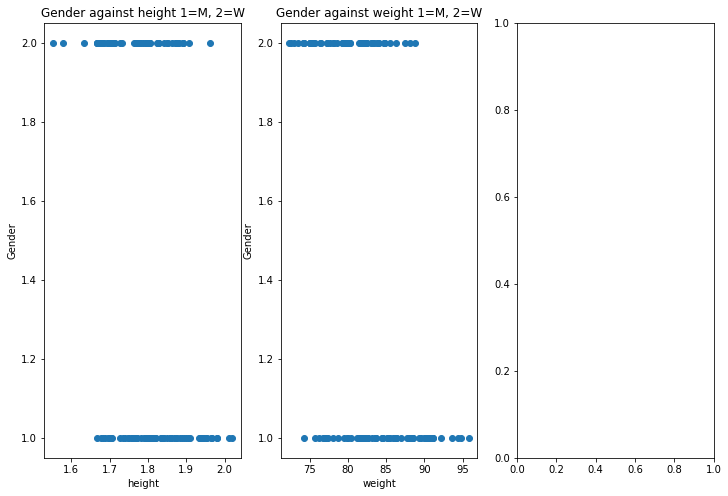

In [73]:
#plt.scatter(X['height'],y)
fig,(ax1,ax2,ax3)=plt.subplots(1,3,figsize=(12,8))
cols=["height","weight"]#,"age"]
axs=[ax1,ax2]#,ax3]
xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
zz = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]


classifiers={"LogisticRegression All features":lr1}
n_classifiers=3
for index, (name, classifier) in enumerate(classifiers.items()):
    y_pred = classifier.predict(X)
    accuracy = accuracy_score(y, y_pred)
    print("Accuracy for %s: %0.1f%% " % (name, accuracy * 100))
    

#ax = plt.axes([0.15, 0.04, 0.7, 0.05])
#plt.title("Probability")
#plt.colorbar(imshow_handle, cax=ax, orientation="horizontal")

#plt.show()
for i in range(2):
    axs[i].set_title(f"Gender against {cols[i]} 1=M, 2=W")
    axs[i].scatter(X[cols[i]],y)
    axs[i].set_xlabel(f"{cols[i]}")
    axs[i].set_ylabel(f"Gender")
    
#plt.savefig(".png")

In [74]:
82/120

0.6833333333333333

In [75]:
29/40

0.725

In [76]:
11/14

0.7857142857142857

In [78]:
df.to_

{'height': {0: 1.702638845375,
  1: 1.6971990153961,
  2: 1.8346274304775,
  3: 1.9370703002624,
  4: 1.8833449771323,
  5: 1.7708625844432,
  6: 1.7663028282995,
  7: 1.8589201835232,
  8: 1.6885861305035,
  9: 1.8535584641831,
  10: 1.9796834737297,
  11: 1.8298612400188,
  12: 1.8624273996642,
  13: 1.7827230671223,
  14: 1.7097182035075,
  15: 1.8033598936309,
  16: 1.6685071195502,
  17: 1.7883749923733,
  18: 1.5774249383703,
  19: 1.6715541277347,
  20: 1.7061901404023,
  21: 1.6982617822049,
  22: 1.7699522417883,
  23: 1.8074555498345,
  24: 1.7336344130993,
  25: 1.7637559408923,
  26: 1.9612373318942,
  27: 1.7006740147337,
  28: 1.8741476211353,
  29: 1.6668225595969,
  30: 1.6674410419192,
  31: 1.8192517926059,
  32: 1.803888487877,
  33: 1.7989567016259,
  34: 1.6674184320267,
  35: 1.9440262777634,
  36: 1.792299479301,
  37: 1.8491896144086,
  38: 1.6790980651054,
  39: 1.8108311807972,
  40: 1.6851539781568,
  41: 1.7491952654594,
  42: 1.8065734415125,
  43: 1.877087